In [1]:
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
from selenium import webdriver

In [2]:
options = webdriver.ChromeOptions() 
options.add_argument("start-maximized")
options.add_argument('--disable-blink-features=AutomationControlled')

executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, options=options)

In [3]:

url = 'https://redplanetscience.com/'

In [4]:

browser.visit(url)

In [5]:
html = browser.html
soup = BeautifulSoup(html)
type(soup)

bs4.BeautifulSoup

In [6]:
soup = BeautifulSoup(browser.html, 'html.parser')

In [7]:
tortillas = soup.find_all('div', class_="col-md-8")
len(tortillas)

15

In [8]:
tortilla = tortillas[0]
tortilla

<div class="col-md-8">
<div class="list_text">
<div class="list_date">March 12, 2023</div>
<div class="content_title">NASA's Mars Perseverance Rover Gets Its Sample Handling System</div>
<div class="article_teaser_body">The system will be collecting and storing Martian rock and soil. Its installation marks another milestone in the march toward the July launch period.</div>
</div>
</div>

In [19]:
rows = []

for tortilla in tortillas: 
    title = tortilla.find("div", {"class": "content_title"}).text
    tease = tortilla.find("div", {"class": "article_teaser_body"}).text
        
    data = {'title': title, 'tease': tease}
    rows.append(data)

df = pd.DataFrame(rows)

In [12]:

df.head()

,title,tease
0,NASA's Mars Perseverance Rover Gets Its Sample...,The system will be collecting and storing Mart...
1,NASA's Mars 2020 Will Hunt for Microscopic Fos...,A new paper identifies a ring of minerals at t...
2,Global Storms on Mars Launch Dust Towers Into ...,A Mars Dust Tower Stands Out Dust storms are c...
3,NASA's MAVEN Observes Martian Night Sky Pulsin...,Vast areas of the Martian night sky pulse in u...
4,NASA's Perseverance Rover 100 Days Out,Mark your calendars: The agency's latest rover...


In [13]:

df.to_json("mars_news.json", orient="records")

In [ ]:

# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html

In [14]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url2 = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'

In [15]:

browser.visit(url2)

In [16]:
html = browser.html
soup = BeautifulSoup(html)
type(soup)

bs4.BeautifulSoup

In [17]:
soup = BeautifulSoup(browser.html, 'html.parser')

In [25]:
table = soup.find("table", {"class": "table"})
rows = table.find_all("tr", {"class":"data-row"})
len(rows)

1867

In [26]:
column = table.find('tr').text.strip().split('\n')

In [30]:
data2 = []

for row in rows:
    vals = [x.text for x in row.find_all("td")]
    full = dict(zip(column, vals))
    data2.append(full)
    
df2 = pd.DataFrame(data2)
df2.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [31]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [32]:
df2 = df2.apply(pd.to_numeric, errors='ignore')

In [33]:
df2['terrestrial_date'] = pd.to_datetime(df2.terrestrial_date)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [34]:
df2.month.nunique()

12

In [35]:
df2.sol.nunique()

1867

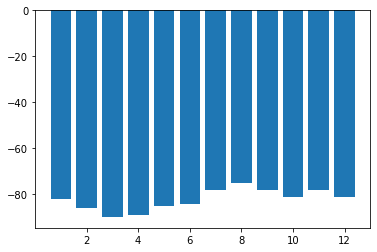

In [36]:
import matplotlib.pyplot as plt
xvalues = df2.month
yvalues = df2.min_temp

plt.bar(xvalues, yvalues)
plt.show()

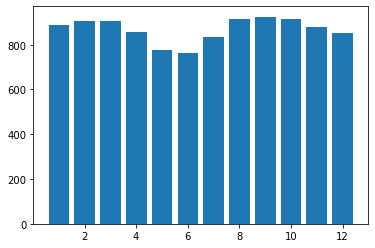

In [37]:
xvalues = df2.month
yvalues = df2.pressure

plt.bar(xvalues, yvalues)
plt.show()

In [38]:
df2.to_csv('Mars Data Table')